In [1]:
### BREAST CANCER CASES ###
###### NEURAL NETWORK CODE IN JUPYTER NOTEBOOK #####

In [2]:
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Code
BC = (pd.read_excel('cancer.xlsx'))


In [4]:
BC.head()

,PAT_ID,Race,MarST,Gender,PatStatus,AgeDiag,Grade,Stability,No.Visits,Lstay,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,32400010,3,1,0,1,52,3,0,5,1,...,1,1,5,1,1,1,1,2,1,1
1,32400023,3,1,0,1,48,3,0,4,3,...,1,1,1,1,0,1,0,1,0,1
2,32400073,3,0,1,1,61,3,0,9,1,...,1,1,2,1,1,1,0,2,0,0
3,32400073,3,1,1,1,63,2,0,3,5,...,1,0,7,1,1,1,0,2,0,0
4,32400396,3,0,0,0,69,2,0,7,9,...,1,0,1,1,1,1,1,2,1,1


In [5]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np

In [6]:
y = BC.PatStatus
x = BC.drop(['PatStatus','PAT_ID'], axis = 1)


In [7]:
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)


## Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [8]:
x_train = x_train_minmax
x_test = x_test_minmax

In [9]:
x_train.shape

(80001, 24)

In [10]:
x_test.shape

(20001, 24)

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
##Fitting the neural network model using training dataset
tns_probs=[0 for _ in range(len(y_test))]

In [ ]:
tmlp=MLPClassifier(hidden_layer_sizes=(6, 6, 6, 6), activation ='relu', solver = 'adam' ,alpha= 0.01, batch_size='auto', learning_rate = 'adaptive', max_iter = 10000,learning_rate_init=0.001, power_t=0.5)

tmlp.fit(x_train, y_train)

In [ ]:
### PREDICTION ON THE TEST DATASET

In [16]:
### Getting the prediction for the Testing dataset
y_predict = tmlp.predict(x_test)

In [ ]:
 ## Keeping the probabilities for Testing outcomes
y_pred = tmlp.predict_proba(x_test)
y_pred = y_pred[:,1]

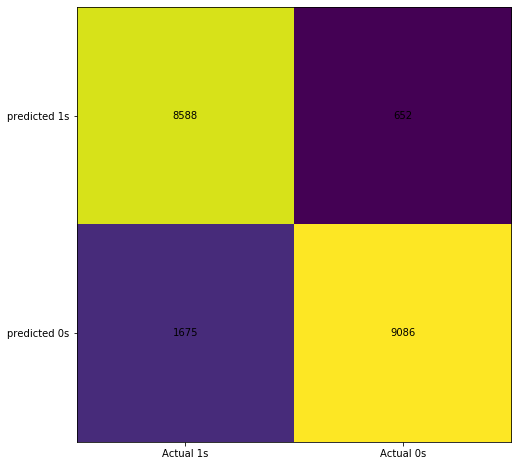

In [17]:
## CONFUSION MATRIX FOR BOTH SEX DATA
test_cm = confusion_matrix(y_test, np.round(y_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(test_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, test_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [18]:
## Error for the prediction for test dataset outcomes
test_error = (test_cm[0,1] + test_cm[1,0])/np.sum(test_cm)
print(test_error)

0.11634418279086045


In [19]:
## Accuracy of prediction
1-test_error

0.8836558172091395

In [20]:
## Sensitivity Analysis 
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.9330457999589238


In [21]:
## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.8367923609081165


In [22]:
## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.8443453210668154


In [23]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.9294372294372294


In [24]:
## The AUC Score
test_auc = roc_auc_score(y_test, tns_probs)
y_pred_auc = np.round(roc_auc_score(y_test, y_pred), decimals = 2)

In [25]:
print(test_auc)

0.5


In [26]:
print(np.round(y_pred_auc, decimals = 2))

0.95


In [27]:
## calculate ROC Curves
test_fpr, test_tpr, _ = roc_curve(y_test, tns_probs)
y_pred_fpr, y_pred_tpr, _ = roc_curve(y_test, y_pred)

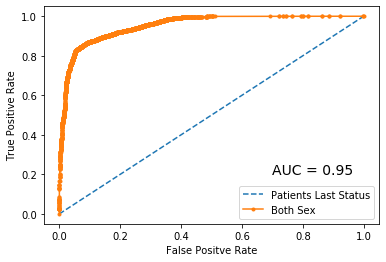

In [28]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(test_fpr, test_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(y_pred_fpr, y_pred_tpr, marker = '.', label = 'Both Sex')
plt.text(0.7, 0.2, "AUC = " + str(y_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()


In [1]:
## CONSIDER THE NEURAL NETWORK FOR EACH GENDER SEPARATELY
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code
BC = (pd.read_excel('cancer.xlsx'))

In [3]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split
#Import numpy#
import numpy as np

## SPLITTING DATA INTO MALE AND FEMALE
BCM=BC[BC.Gender==1]
BCF=BC[BC.Gender==0]

In [4]:
#### THE MALE DATASET 
my=BCM.PatStatus
mx=BCM.drop(['PatStatus','PAT_ID', 'Gender'], axis=1)

In [5]:
## THE FEMALE DATASET
fy=BCF.PatStatus
fx=BCF.drop(['PatStatus','PAT_ID', 'Gender'],axis=1)

In [6]:
## CONSIDER FITTING NEURAL NETWORK FOR THE MALE GENDER

In [7]:
#Split the Male data into train and test sets #
mx_train, mx_test, my_train, my_test=train_test_split(mx,my, test_size=0.2, random_state=124)


In [8]:
mx_train.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
41599,1,1,65,3,0,16,9,2,1,0,...,1,0,2,1,1,1,0,1,0,1
25664,1,1,61,3,1,16,9,5,1,0,...,1,1,3,1,1,1,0,1,0,0
44540,6,0,74,2,0,10,9,8,1,0,...,1,0,2,1,1,1,0,1,0,1
46913,1,0,90,3,0,10,12,3,1,0,...,1,0,2,0,1,1,0,1,1,1
31494,1,1,71,3,0,10,9,4,1,0,...,1,0,2,1,1,1,0,1,1,1


In [9]:
mx_test.head()

,Race,MarST,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,FamHist,PrioBSurgy,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
3055,1,0,62,1,0,4,5,5,1,0,...,1,0,1,1,0,1,0,2,0,0
30043,1,0,76,3,0,10,9,4,1,0,...,1,0,2,1,1,1,0,1,0,0
27137,1,0,85,2,0,10,9,4,1,0,...,1,0,2,0,1,1,0,1,0,0
22922,1,1,78,2,0,10,9,8,1,0,...,1,1,3,1,1,1,0,1,0,0
44064,1,1,45,2,0,14,9,2,1,0,...,1,0,2,0,1,1,0,1,0,1


In [10]:
mx_train.shape

(12479, 23)

In [11]:
mx_test.shape

(3120, 23)

In [12]:
## Scaling the male data set
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
mx_train_minmax = min_max_scaler.fit_transform(mx_train)
mx_test_minmax = min_max_scaler.fit_transform(mx_test)

In [13]:
mx_train = mx_train_minmax
mx_test = mx_test_minmax

In [14]:
## FITTING NEURAL NETWORK FOR MALE DATA

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [16]:
##Fitting the neural network model using training dataset
tns_probs=[0 for _ in range(len(my_test))]

In [17]:
male_mlp=MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8, 8), activation ='relu', solver = 'adam' ,alpha= 0.0001, batch_size='auto', learning_rate = 'adaptive', max_iter = 10000, learning_rate_init=0.001, power_t=0.5)
male_mlp.fit(mx_train, my_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8, 8, 8, 8), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
### PREDICTION USING THE TEST DATASET

In [19]:
### Getting the prediction for the Testing dataset
my_predict = male_mlp.predict(mx_test)

In [20]:
## Keeping the probabilities for Testing outcomes
my_pred = male_mlp.predict_proba(mx_test)
my_pred = my_pred[:,1]

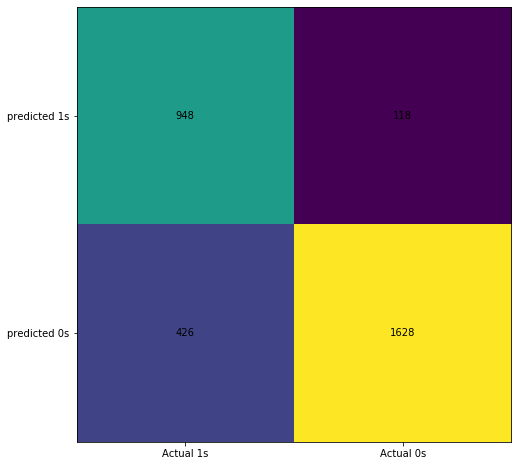

In [21]:
## CONFUSION MATRIX FOR MALE DATA
mtest_cm = confusion_matrix(my_test, np.round(my_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(mtest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, mtest_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [22]:
## Error for the prediction for test dataset outcomes
mtest_error = (mtest_cm[0,1] + mtest_cm[1,0])/np.sum(mtest_cm)
print(mtest_error)

0.17435897435897435


In [23]:
## Accuracy of prediction
1-mtest_error

0.8256410256410256

In [24]:
## Sensitivity Analysis 
mtest_sens = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[0, 1])
print(mtest_sens)

0.9324169530355098


In [25]:
## Specificity Analysis
mtest_spec = mtest_cm[0, 0]/(mtest_cm[0, 0]+ mtest_cm[1, 0])
print(mtest_spec)

0.6899563318777293


In [26]:
## PPV Analysis
mtest_npv = mtest_cm[1, 1]/(mtest_cm[1, 1] + mtest_cm[1, 0])
print(mtest_npv)

0.7925998052580331


In [27]:
## NPV Analysis
mtest_npv = mtest_cm[0, 0]/(mtest_cm[0, 0] + mtest_cm[0, 1])
print(mtest_npv)

0.8893058161350844


In [28]:
## The AUC Score
tns_probs=[0 for _ in range(len(my_test))]
mtest_auc = roc_auc_score(my_test, tns_probs)
my_pred_auc = np.round(roc_auc_score(my_test, my_pred), decimals = 2)

In [29]:
print(mtest_auc)

0.5


In [30]:
print(np.round(my_pred_auc, decimals = 2))

0.88


In [31]:
## calculate ROC Curves
mtest_fpr, mtest_tpr, _ = roc_curve(my_test, tns_probs)
my_pred_fpr, my_pred_tpr, _ = roc_curve(my_test, my_pred)

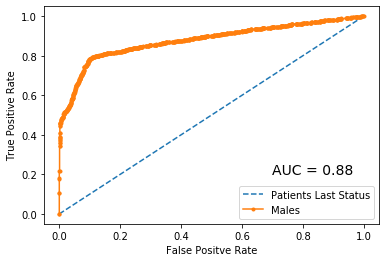

In [32]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mtest_fpr, mtest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(my_pred_fpr, my_pred_tpr, marker = '.', label = 'Males')
plt.text(0.7, 0.2, "AUC = " + str(my_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()

In [1]:
## CONSIDERING THE FEMALE DATA
## The new fitted logistic regression model with selected variables
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
BC = (pd.read_excel('cancer.xlsx'))
BCF=BC[BC.Gender==0]

fy=BCF.PatStatus
fx=BCF.drop(['PatStatus','PAT_ID', 'Gender'],axis=1)

In [2]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the Male data into train and test sets #
fx_train, fx_test, fy_train, fy_test=train_test_split(fx,fy, test_size=0.2, random_state=125)


In [3]:
# Scaling the female data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
fx_train_minmax = min_max_scaler.fit_transform(fx_train)
fx_test_minmax = min_max_scaler.fit_transform(fx_test)


In [5]:
fx_train = fx_train_minmax
fx_test = fx_test_minmax

In [6]:
### FITTING THE NEURAL NETWORK USING THE FEMALE TRAINING DATASET 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

tns_probs=[0 for _ in range(len(fy_test))]

In [7]:
female_mlp=MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8, 8), activation ='relu', solver = 'adam' ,alpha= 0.0001, batch_size='auto', learning_rate = 'adaptive', max_iter = 10000, learning_rate_init=0.001, power_t=0.5)
female_mlp.fit(fx_train, fy_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8, 8, 8, 8), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [8]:
## PREDICTION USING THE TEST DATASET

In [9]:
### Getting the prediction for the Testing dataset
fy_predict = female_mlp.predict(fx_test)

In [10]:
## Keeping the probabilities for Testing outcomes
fy_pred = female_mlp.predict_proba(fx_test)
fy_pred = fy_pred[:,1]

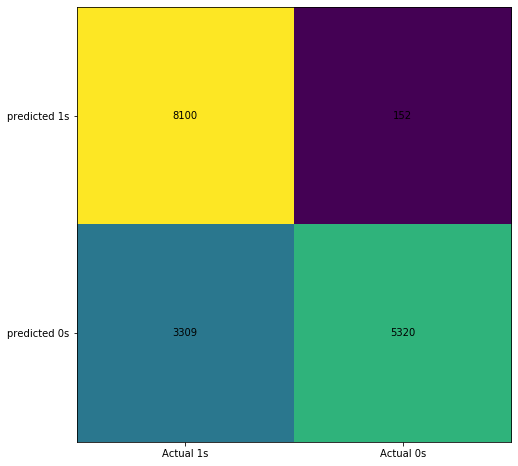

In [11]:
## confusion matrix for female gender
ftest_cm = confusion_matrix(fy_test, np.round(fy_predict))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(ftest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, ftest_cm[i, j], ha= 'center', va= 'center', color= 'black')
plt.show()

In [12]:
## Error for the prediction for test dataset outcomes
ftest_error = (ftest_cm[0,1] + ftest_cm[1,0])/np.sum(ftest_cm)
print(ftest_error)

0.20502339908773176


In [13]:
## Accuracy of prediction
1-ftest_error

0.7949766009122683

In [14]:
## Sensitivity Analysis 
ftest_sens = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[0, 1])
print(ftest_sens)

0.9722222222222222


In [15]:
## Specificity Analysis
ftest_spec = ftest_cm[0, 0]/(ftest_cm[0, 0]+ ftest_cm[1, 0])
print(ftest_spec)

0.7099658164606889


In [17]:
## PPV Analysis
ftest_npv = ftest_cm[1, 1]/(ftest_cm[1, 1] + ftest_cm[1, 0])
print(ftest_npv)

0.6165256692548383


In [18]:
## NPV Analysis
ftest_npv = ftest_cm[0, 0]/(ftest_cm[0, 0] + ftest_cm[0, 1])
print(ftest_npv)

0.9815802229762481


In [19]:
## The AUC Score
ftest_auc = roc_auc_score(fy_test, tns_probs)
fy_pred_auc = np.round(roc_auc_score(fy_test, fy_pred), decimals = 2)

In [20]:
print(ftest_auc)

0.5


In [21]:
print(np.round(fy_pred_auc, decimals = 2))

0.95


In [22]:
## calculate ROC Curves
ftest_fpr, ftest_tpr, _ = roc_curve(fy_test, tns_probs)
fy_pred_fpr, fy_pred_tpr, _ = roc_curve(fy_test, fy_pred)

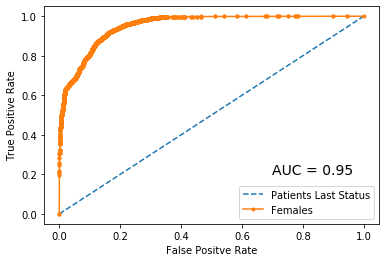

In [23]:
## Plot Curve for the model
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ftest_fpr, ftest_tpr, linestyle = '--', label = 'Patients Last Status')
plt.plot(fy_pred_fpr, fy_pred_tpr, marker = '.', label = 'Females')
plt.text(0.7, 0.2, "AUC = " + str(fy_pred_auc), fontsize = 14)

## Axis lable
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")

## Show Legend
plt.legend()